<a href="https://colab.research.google.com/github/hbr8218/machine-learning/blob/master/sales_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import gzip

In [0]:
"""for filename in ['sample_submission.csv.gz','sales_train.csv.gz','test.csv.gz']:
  with gzip.open(filename, 'rt') as f:
    data = f.read()
    with open(filename[:-3], 'wt') as f:
      f.write(data)
"""

"for filename in ['sample_submission.csv.gz','sales_train.csv.gz','test.csv.gz']:\n  with gzip.open(filename, 'rt') as f:\n    data = f.read()\n    with open(filename[:-3], 'wt') as f:\n      f.write(data)\n"

In [0]:
import pandas as pd

In [0]:
df =  pd.read_csv('sales_train.csv')

In [0]:
df.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [0]:
pd.read_csv('sample_submission.csv').head()

,ID,item_cnt_month
0,0,0.5
1,1,0.5
2,2,0.5
3,3,0.5
4,4,0.5


In [0]:
df.shape

(2935849, 6)

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
date              object
date_block_num    int64
shop_id           int64
item_id           int64
item_price        float64
item_cnt_day      float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB


In [0]:
df.tail()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
2935844,10.10.2015,33,25,7409,299.0,1.0
2935845,09.10.2015,33,25,7460,299.0,1.0
2935846,14.10.2015,33,25,7459,349.0,1.0
2935847,22.10.2015,33,25,7440,299.0,1.0
2935848,03.10.2015,33,25,7460,299.0,1.0


In [0]:
ts = df.groupby(["date_block_num"])["item_cnt_day"].sum()

In [0]:
ts.index=pd.date_range(start = '2013-01-01',end='2015-10-01', freq = 'MS')

In [0]:
ts.head(4)

2013-01-01    131479.0
2013-02-01    128090.0
2013-03-01    147142.0
2013-04-01    107190.0
Freq: MS, Name: item_cnt_day, dtype: float64

In [0]:
ts=ts.reset_index()
ts.head()

,index,item_cnt_day
0,2013-01-01,131479.0
1,2013-02-01,128090.0
2,2013-03-01,147142.0
3,2013-04-01,107190.0
4,2013-05-01,106970.0


In [0]:
from fbprophet import Prophet

In [0]:
m = Prophet(yearly_seasonality=True)

In [0]:
ts.columns=['ds','y']

In [0]:
ts.head()

,ds,y
0,2013-01-01,131479.0
1,2013-02-01,128090.0
2,2013-03-01,147142.0
3,2013-04-01,107190.0
4,2013-05-01,106970.0


In [0]:
m.fit(ts)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/hassan/anaconda3/lib/python3.7/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [0]:
future = m.make_future_dataframe(periods = 5,freq='MS')

In [0]:
forecast = m.predict(future)

In [0]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-01-01,141678.041599,129030.419812,135206.174626,141678.041599,141678.041599,-9566.680439,-9566.680439,-9566.680439,-9566.680439,-9566.680439,-9566.680439,0.0,0.0,0.0,132111.361160
1,2013-02-01,139958.210312,127894.175207,134129.857189,139958.210312,139958.210312,-8929.017339,-8929.017339,-8929.017339,-8929.017339,-8929.017339,-8929.017339,0.0,0.0,0.0,131029.192974
2,2013-03-01,138404.814316,144788.938647,150938.423359,138404.814316,138404.814316,9641.575105,9641.575105,9641.575105,9641.575105,9641.575105,9641.575105,0.0,0.0,0.0,148046.389421
3,2013-04-01,136684.983023,104287.083066,110690.542305,136684.983023,136684.983023,-29103.298617,-29103.298617,-29103.298617,-29103.298617,-29103.298617,-29103.298617,0.0,0.0,0.0,107581.684407
4,2013-05-01,135020.630152,104355.640253,110636.621477,135020.630152,135020.630152,-27684.049165,-27684.049165,-27684.049165,-27684.049165,-27684.049165,-27684.049165,0.0,0.0,0.0,107336.580987


In [0]:
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
34,2015-11-01,83193.957416,80319.247717,86196.377217
35,2015-12-01,125513.063181,122274.764046,128867.362134
36,2016-01-01,75625.688717,72461.154947,78843.989640
37,2016-02-01,40109.144632,37056.952481,43291.022905
38,2016-03-01,76664.084927,73401.268170,79846.856010


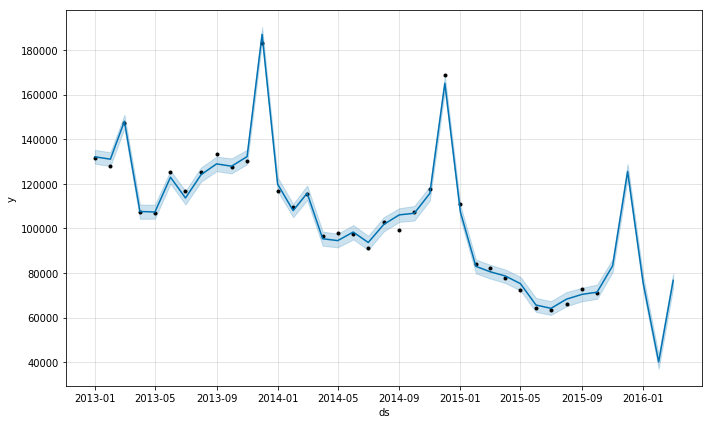

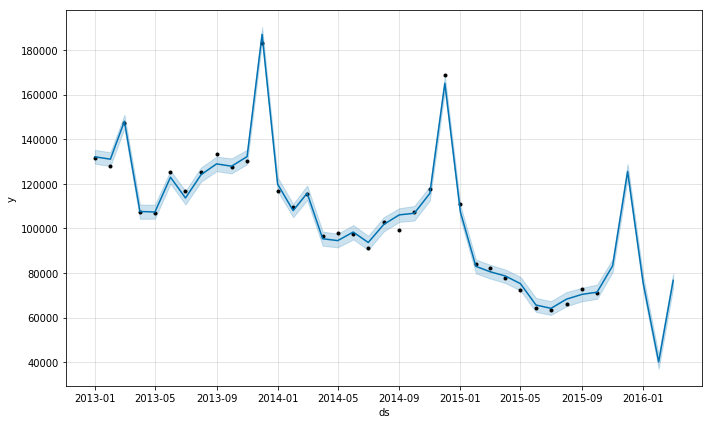

In [0]:
m.plot(forecast)

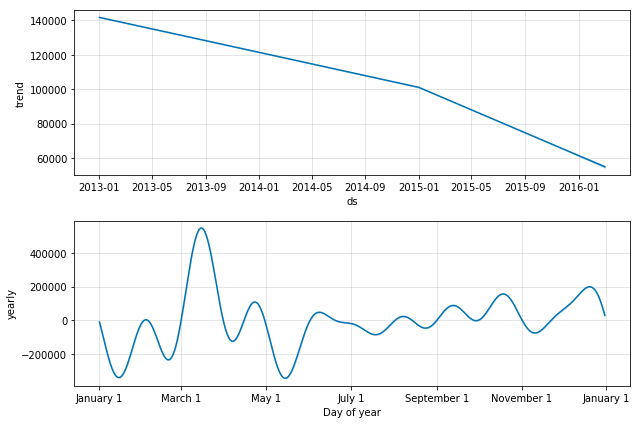

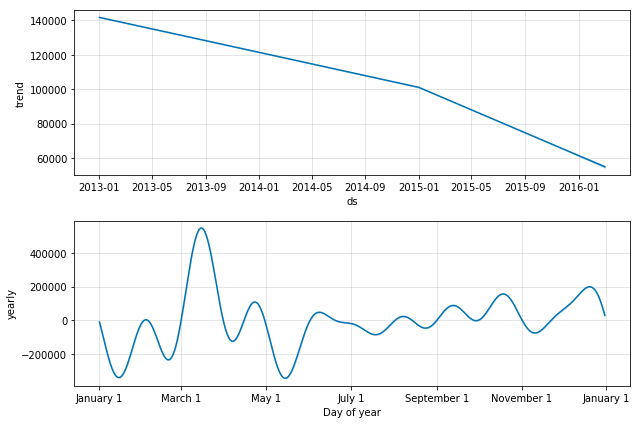

In [0]:
m.plot_components(forecast)